# PyIRI Tutorial: Global Monthly Mean Ionospheric Parameters

This tutorial demonstrates how to use the **PyIRI** model (with its spherical harmonics architecture) to compute and visualize global maps of ionospheric parameters for a specified month and year.

Specifically, this example shows how to:

- Configure the PyIRI model for a given date
- Specify the **foF2** and **hmF2** models (e.g., CCIR or URSI for foF2; SHU2015, AMTB2013, or BSE1979 for hmF2)
- Generate a **horizontal global grid** in **geographic coordinates (GEO)**
- Evaluate monthly mean ionospheric parameters at each grid point over a full 24-hour UT cycle under both **low** and **high** solar activity conditions

> **Note**: This example uses **GEO** input coordinates (longitude, latitude).
> The PyIRI model also supports input in:
> - **Magnetic Local Time & Quasi-Dipole Latitude (MLT)**
> - **Quasi-Dipole Longitude & Latitude (QD)**  
> See the coordinate transformation tutorial for how to generate and use these input formats.

---

### Output

The output consists of gridded global maps of key ionospheric parameters. For example, the `F2` dictionary includes:

- **foF2** – Peak plasma frequency of the F2 layer  
- **hmF2** – Peak height of the F2 layer  
- **B0** and **B1** – Thickness and shape parameters defining the electron density profile  

All output maps have the shape **(N_T, N_G, 2)**, where:  
- `N_T` is the number of time points (from the UT array)  
- `N_G` is the number of horizontal grid locations  
- The last dimension `2` corresponds to results for **low** and **high** solar activity levels

In [1]:
# Import libraries
import numpy as np
import PyIRI
import PyIRI.sh_library as sh  # Updated PyIRI using spherical harmonics
import matplotlib.pyplot as plt

# Specify date
year = 2020
month = 4
day = 1

# Specify solar activity index (F10.7 in SFU)
F107 = 100

# Create horizontal grid
lon_res = 5
lat_res = 5
alon_2d, alat_2d = np.mgrid[-180:180 + lon_res:lon_res, -90:90 + lat_res:lat_res]
alon = np.reshape(alon_2d, alon_2d.size)
alat = np.reshape(alat_2d, alat_2d.size)

# Time grid: Universal Time from 0 to 24 in 15-minute steps
hr_res = 0.25
aUT = np.arange(0, 24, hr_res)

# Coefficient sources and model options
foF2_coeff = 'CCIR'       # Options: 'CCIR' or 'URSI'
hmF2_model = 'SHU2015'    # Options: 'SHU2015', 'AMTB2013', 'BSE1979'
coord = 'GEO'             # Coordinate system: 'GEO', 'QD', or 'MLT'
coeff_dir = None          # Use default coefficient path

# ----------------------------------------
# Run PyIRI (Spherical Harmonics version)
# ----------------------------------------
# Compute ionospheric parameters for F2, F1, and E layers
F2, F1, E, sun, mag = sh.IRI_monthly_mean_par(year,
                                              month,
                                              aUT,
                                              alon,
                                              alat,
                                              coeff_dir=coeff_dir,
                                              foF2_coeff=foF2_coeff,
                                              hmF2_model=hmF2_model,
                                              coord=coord)

### Plot results

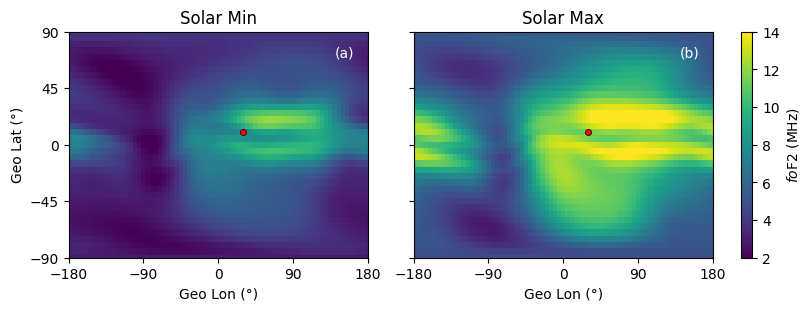

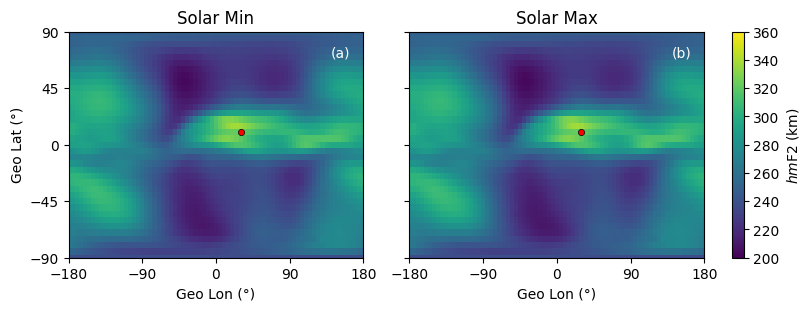

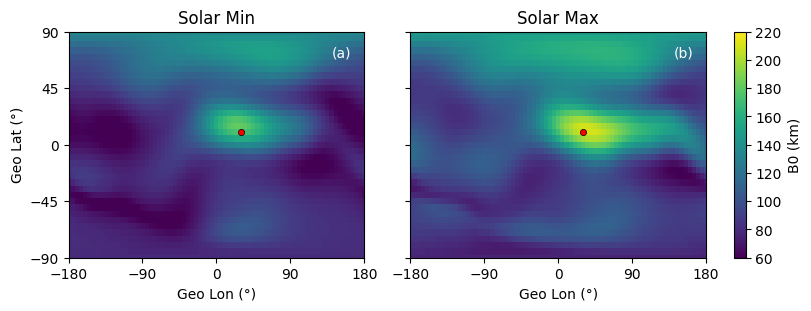

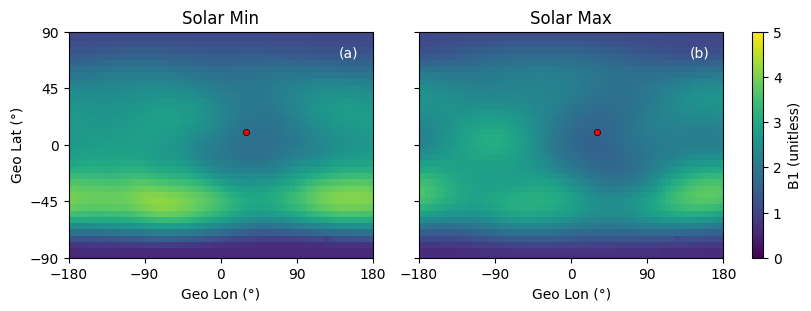

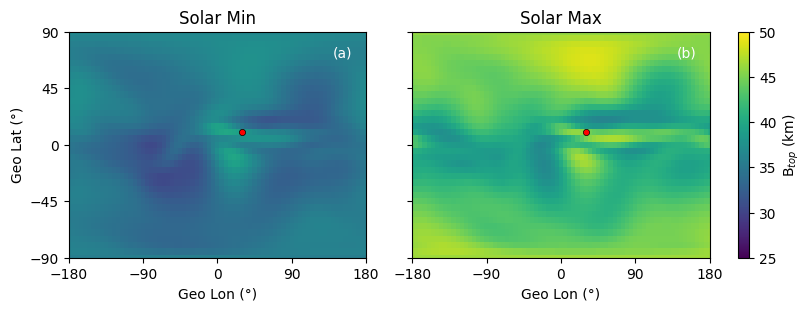

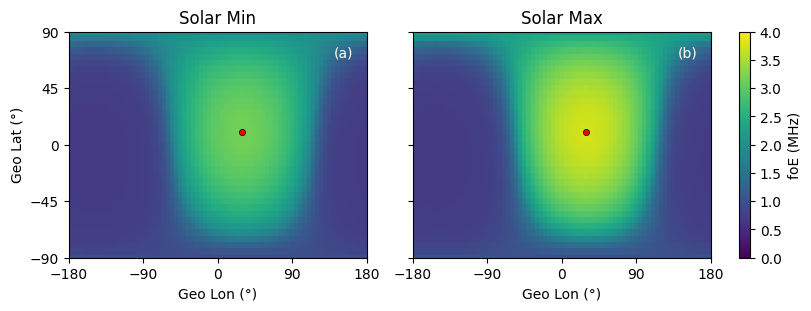

In [2]:
# Select a time frame to plot
UT_plot = 10

ind_time = np.where(aUT == UT_plot)
ind_grid = np.where(np.isfinite(alon))

# Plot foF2 min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(F2['fo'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=2, vmax=14)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('$fo$F2 (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foF2_min_max.png', format='pdf', bbox_inches='tight')


# Plot hmF2 min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(F2['hm'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=200, vmax=360)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('$hm$F2 (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_hmF2_min_max.png', format='pdf', bbox_inches='tight')


# Plot B0 min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(F2['B0'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=60, vmax=220)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('B0 (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B0_min_max.png', format='pdf', bbox_inches='tight')


# Plot B1 min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(F2['B1'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=5)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('B1 (unitless)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B0_min_max.png', format='pdf', bbox_inches='tight')


# Plot B_top min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(F2['B_top'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=25, vmax=50)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('B$_{top}$ (km)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_B_top_min_max.png', format='pdf', bbox_inches='tight')

# Plot foE min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(E['fo'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=4)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('foE (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foE_min_max.png', format='pdf', bbox_inches='tight')

### Run PyIRI for sporadic E model

In [3]:
# ----------------------------------------------
# Run PyIRI (Spherical Harmonics version) for Es
# ----------------------------------------------
Es = sh.sporadic_E_monthly_mean(year,
                                month,
                                aUT,
                                alon,
                                alat,
                                coeff_dir=None,
                                coord='GEO')

### Plot Results for Es

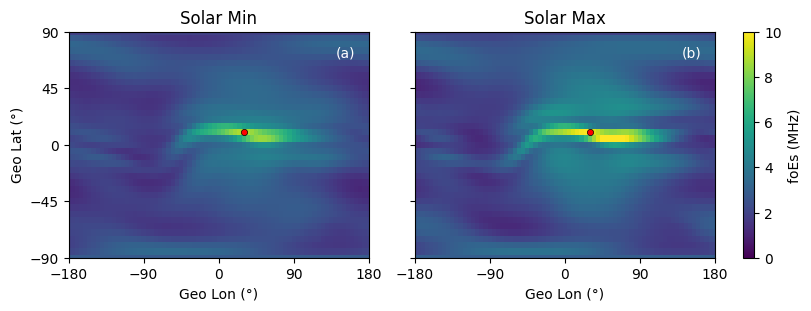

In [4]:
# Plot foEs min and max
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3),
                        constrained_layout=True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xticks(np.arange(-180, 180 + 45, 90))
plt.yticks(np.arange(-90, 90 + 45, 45))
abc = ['(a)', '(b)']
atitle = ['Solar Min', 'Solar Max']
for isol in range(0, 2):
    ax[isol].set_facecolor('grey')
    ax[isol].set_xlabel('Geo Lon (°)')
    ax[isol].set_ylabel('Geo Lat (°)')
    if isol == 1:
        ax[1].set_ylabel(' ')
    z = np.reshape(Es['fo'][ind_time, ind_grid, isol], alon_2d.shape)
    mesh = ax[isol].pcolormesh(alon_2d, alat_2d, z, vmin=0, vmax=10)
    ax[isol].text(140, 70, abc[isol], c='white')
    ax[isol].title.set_text(atitle[isol])
    ax[isol].scatter(sun['lon'][ind_time], sun['lat'][ind_time],
                        c='red', s=20, edgecolors="black", linewidths=0.5)
cbar = fig.colorbar(mesh, ax=ax[1])
cbar.set_label('foEs (MHz)')
# Save figure
plot_dir = '../figures/'
plt.savefig(plot_dir + 'PyIRI_sh_foEs_min_max.png', format='pdf', bbox_inches='tight')